# **Pylint** analysis **before** issues fixing

Command launched

```pylint src --output-format=json:reports/linters/2.0.0-report-pylint-before.json,colorized --clear-cache-post-run=true```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 18, 8
import random
import numpy as np

my_red_palette = ['#9d0208', '#ff1100', '#e85d04', '#faa307', '#ffcd34', '#fff3b0']
my_pastel_palette = ['#b9fbc0', '#98f5e1', '#8eecf5', '#90dbf4', '#a3c4f3', '#cfbaf0', '#f1c0e8', '#ffcfd2', '#fde4cf', '#fbf8cc']
before_report = '../reports/linters/2.0.0-report-pylint-before.json'
after_report = '../reports/linters/2.1.0-report-pylint-after.json'

In [2]:
df1 = pd.read_json(before_report)
df1.sample(5, random_state=3)

,type,module,obj,line,column,endLine,endColumn,path,symbol,message,message-id
323,convention,src.data.extract_data,,13,0,NaN,NaN,src/data/extract_data.py,trailing-whitespace,Trailing whitespace,C0303
74,refactor,src.utils,applyRandomDistorsion,49,29,49.0,61.0,src/utils.py,unnecessary-comprehension,"Unnecessary use of a comprehension, use list(r...",R1721
329,convention,src.data.extract_data,extract,12,0,12.0,11.0,src/data/extract_data.py,missing-function-docstring,Missing function or method docstring,C0116
15,warning,src.utils,,30,0,NaN,NaN,src/utils.py,bad-indentation,"Bad indentation. Found 2 spaces, expected 8",W0311
267,warning,src.models.model,,80,0,NaN,NaN,src/models/model.py,bad-indentation,"Bad indentation. Found 2 spaces, expected 8",W0311


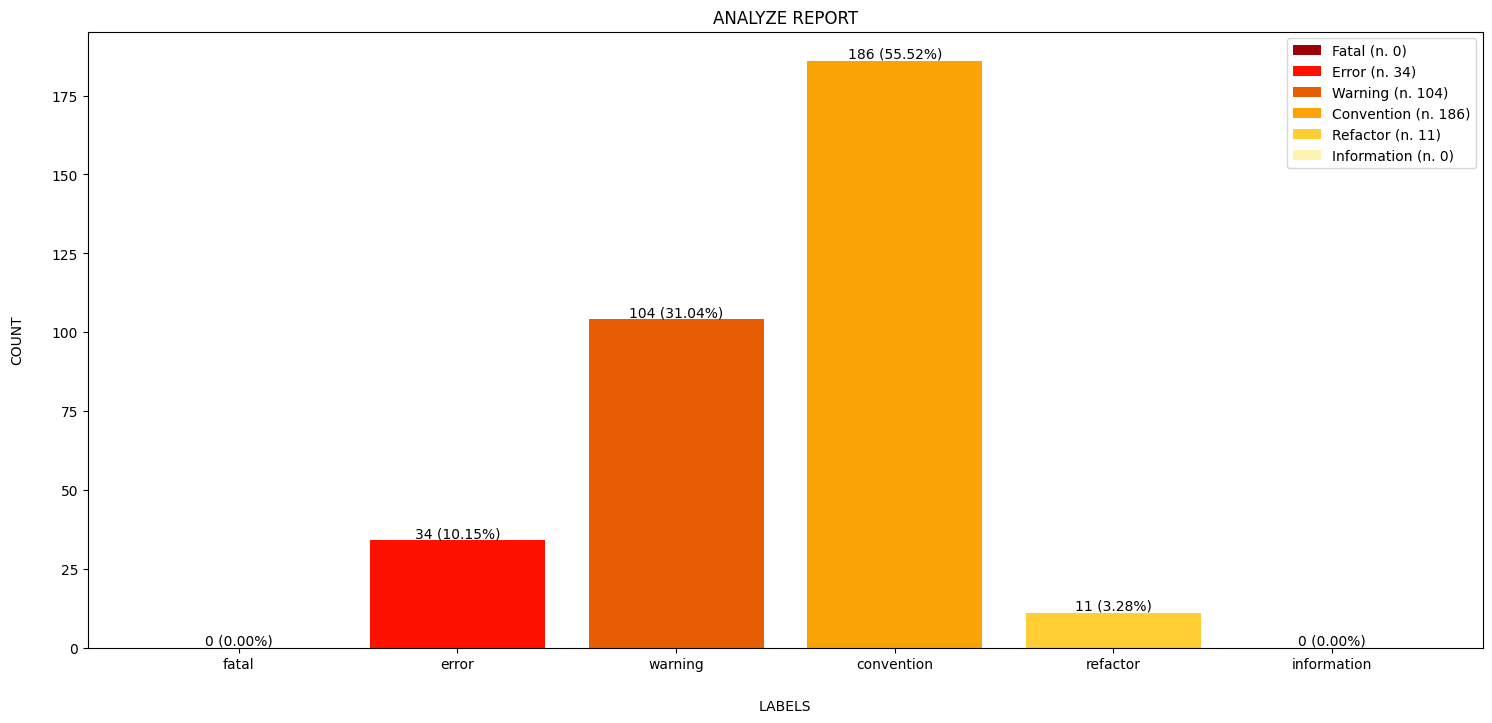

In [3]:
count1 = df1.type.value_counts()
missing = pd.Series([0, 0], index=['fatal', 'information'])
count1.add(missing, fill_value=0)
order = ['fatal','error','warning','convention','refactor','information']
ordered_by_severity1 = count1.reindex(index = order, fill_value=0)
bar_labels = [ordered_by_severity1.index[i].capitalize()+' (n. ' + str(ordered_by_severity1[i]) + ')' for i in range(len(ordered_by_severity1.index))]
bars = plt.bar(ordered_by_severity1.index, height=ordered_by_severity1, label=bar_labels, color=my_red_palette)
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(df1)*100:.2f}%)', ha='center', va='bottom')
plt.xlabel('LABELS', labelpad=20)
plt.ylabel('COUNT', labelpad=20)
plt.title('ANALYZE REPORT')
plt.legend()
plt.show()

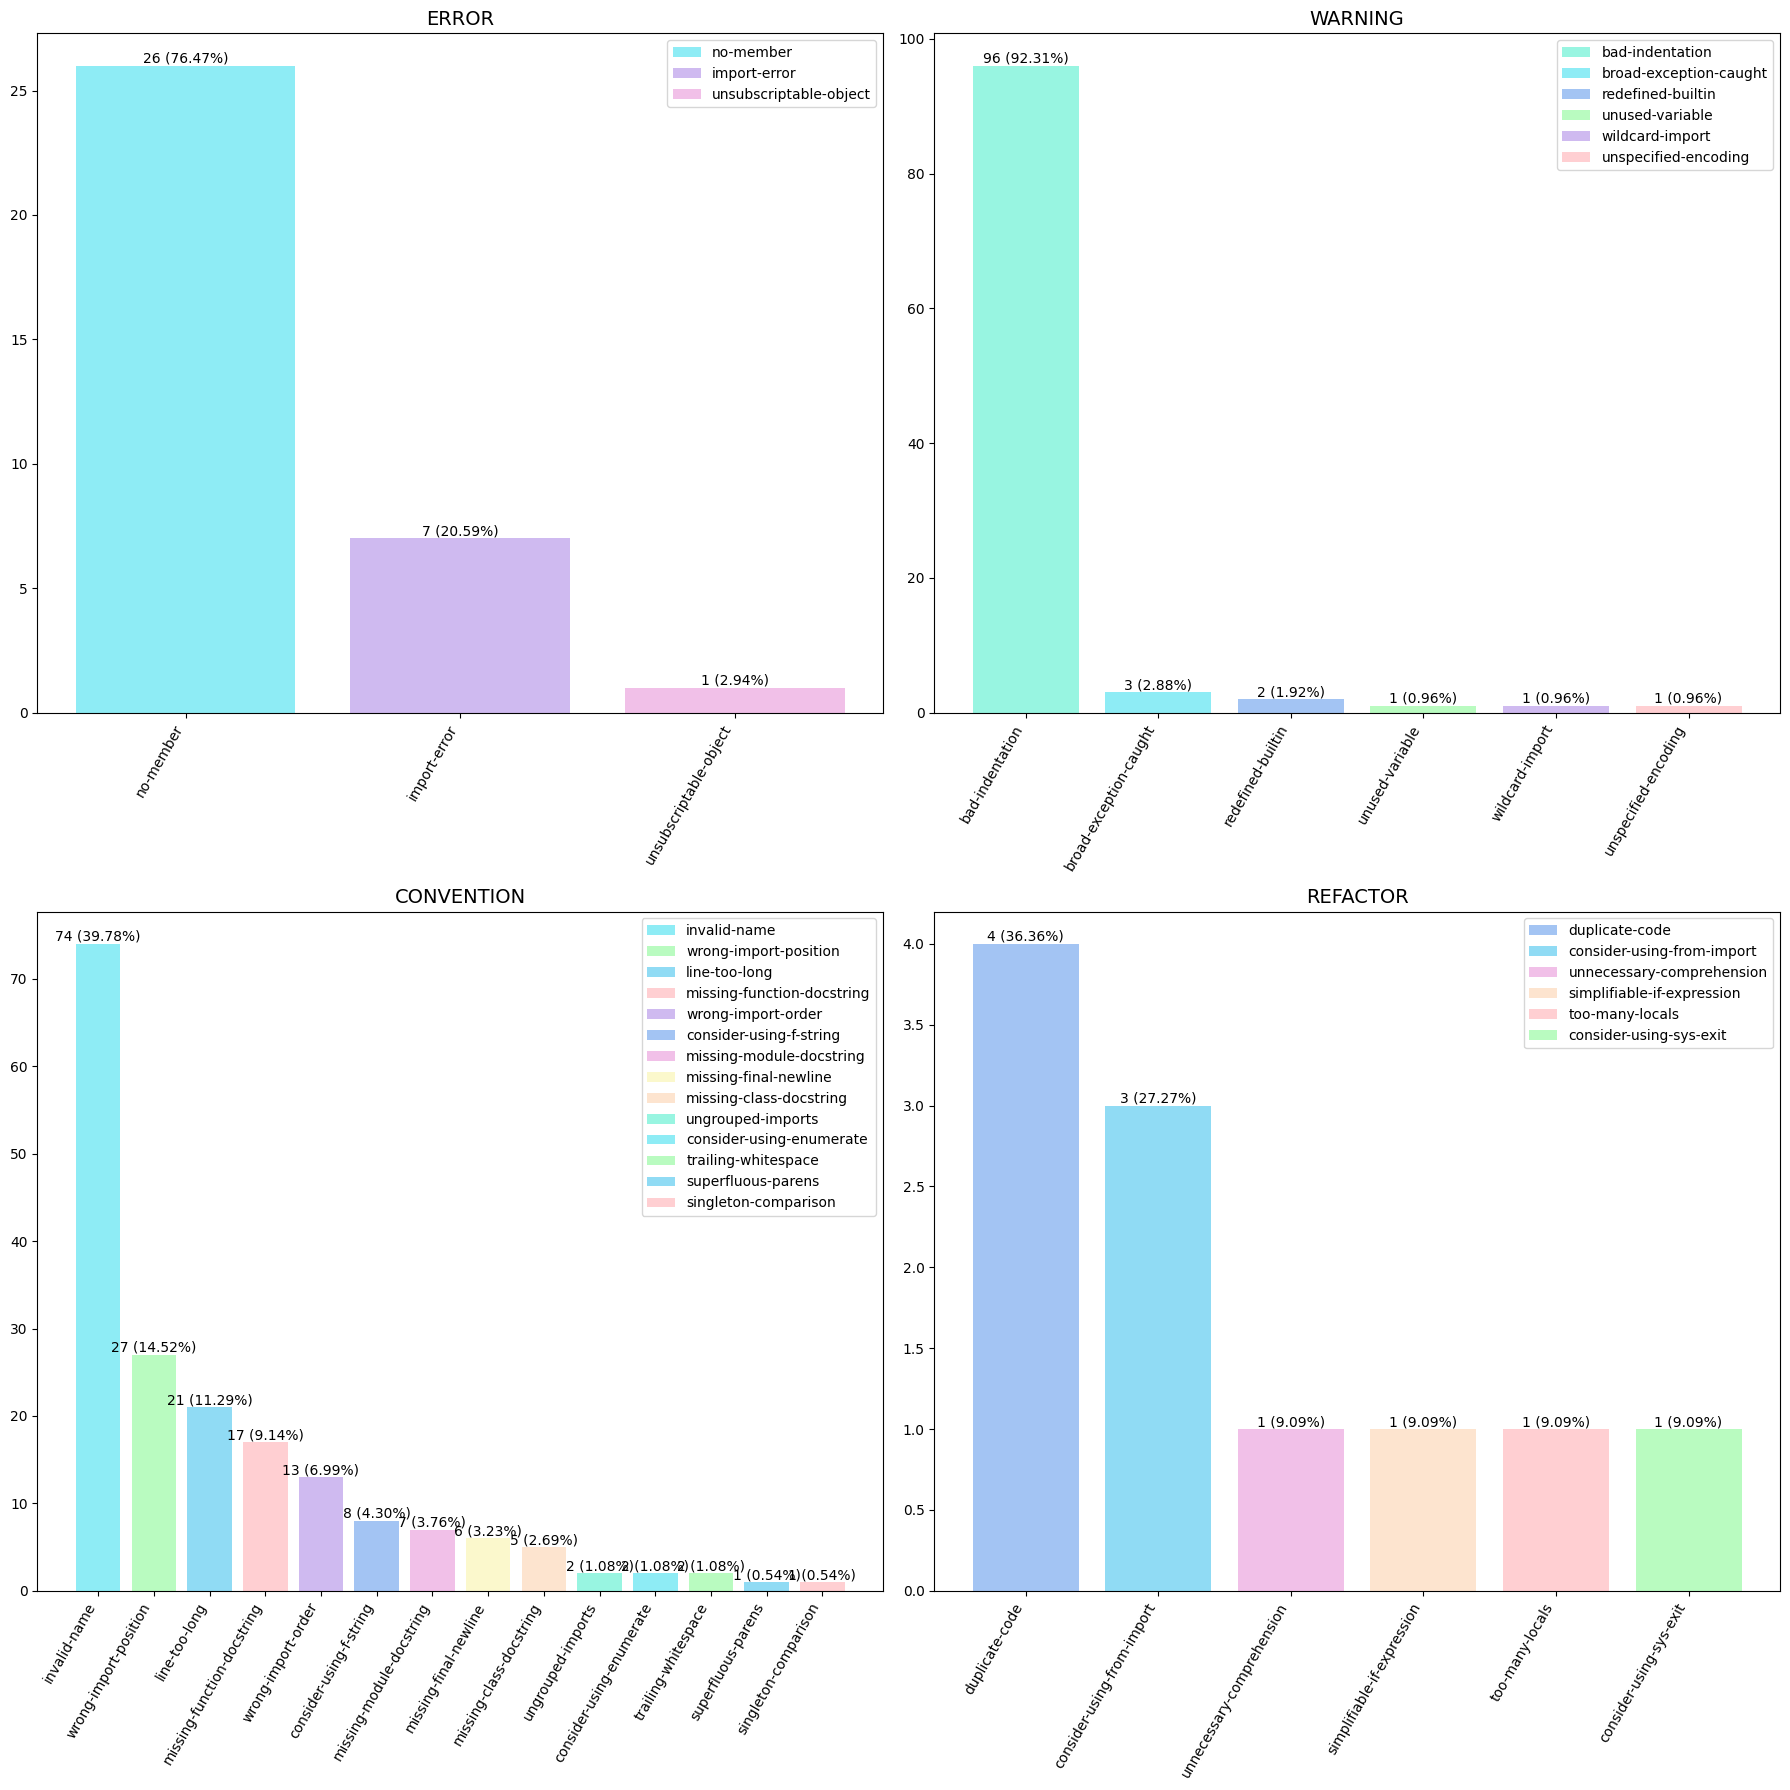

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(18, 18))
mgs = ['error', 'warning', 'convention', 'refactor']
dfs = [df1.loc[df1['type'] == m] for m in mgs]
counter = 0
for ax_r in axs:
    for ax in ax_r:
        s = dfs[counter].symbol.value_counts()
        l = [s.index[i]+' (n. ' + str(s[i]) + ')' for i in range(len(s.index))]
        random.shuffle(my_pastel_palette)
        bars = ax.bar(s.index, height=s.values, label=s.index, color=my_pastel_palette)
        for rect in bars:
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} ({height/len(dfs[counter])*100:.2f}%)', ha='center', va='bottom')
        ax.set_title(mgs[counter].upper(), fontsize = 14)
        ax.xaxis.set_ticks(s.index)
        ax.set_xticklabels(labels=s.index, rotation=60, ha="right")
        ax.legend(loc='upper right')
        counter = counter+1
plt.tight_layout()
plt.show()

In [18]:
# Code for checking the single issues to fix
# label = 'refactor'
# df1 = pd.read_json('somefile.json')
# err = df1.loc[df1['type'] == label]
# print(err.path.value_counts())
# df1.loc[(df1['type'] == label) & (df1['path'] == 'src/data/extract_data.py')]

#  **Pylint** analysis **after** issues fixing

Command launched AFTER fixing issues

```pylint src --output-format=json:reports/linters/2.1.0-report-pylint-after.json,colorized --clear-cache-post-run=true```

In [5]:
df2 = pd.read_json(after_report)
df2.sample(5, random_state=3)

,type,module,obj,line,column,endLine,endColumn,path,symbol,message,message-id
3,refactor,src.data.extract_data,,1,0,NaN,NaN,src/data/extract_data.py,duplicate-code,Similar lines in 2 files\n==src.models.predict...,R0801
5,refactor,src.data.extract_data,,1,0,NaN,NaN,src/data/extract_data.py,duplicate-code,Similar lines in 2 files\n==src.models.predict...,R0801
4,refactor,src.data.extract_data,,1,0,NaN,NaN,src/data/extract_data.py,duplicate-code,Similar lines in 2 files\n==src.models.predict...,R0801
1,warning,src.models.predict_model,,13,0,13.0,19.0,src/models/predict_model.py,unused-wildcard-import,"Unused import(s) Block, Encoder, Decoder, UNet...",W0614
0,warning,src.models.predict_model,,13,0,13.0,19.0,src/models/predict_model.py,wildcard-import,Wildcard import model,W0401


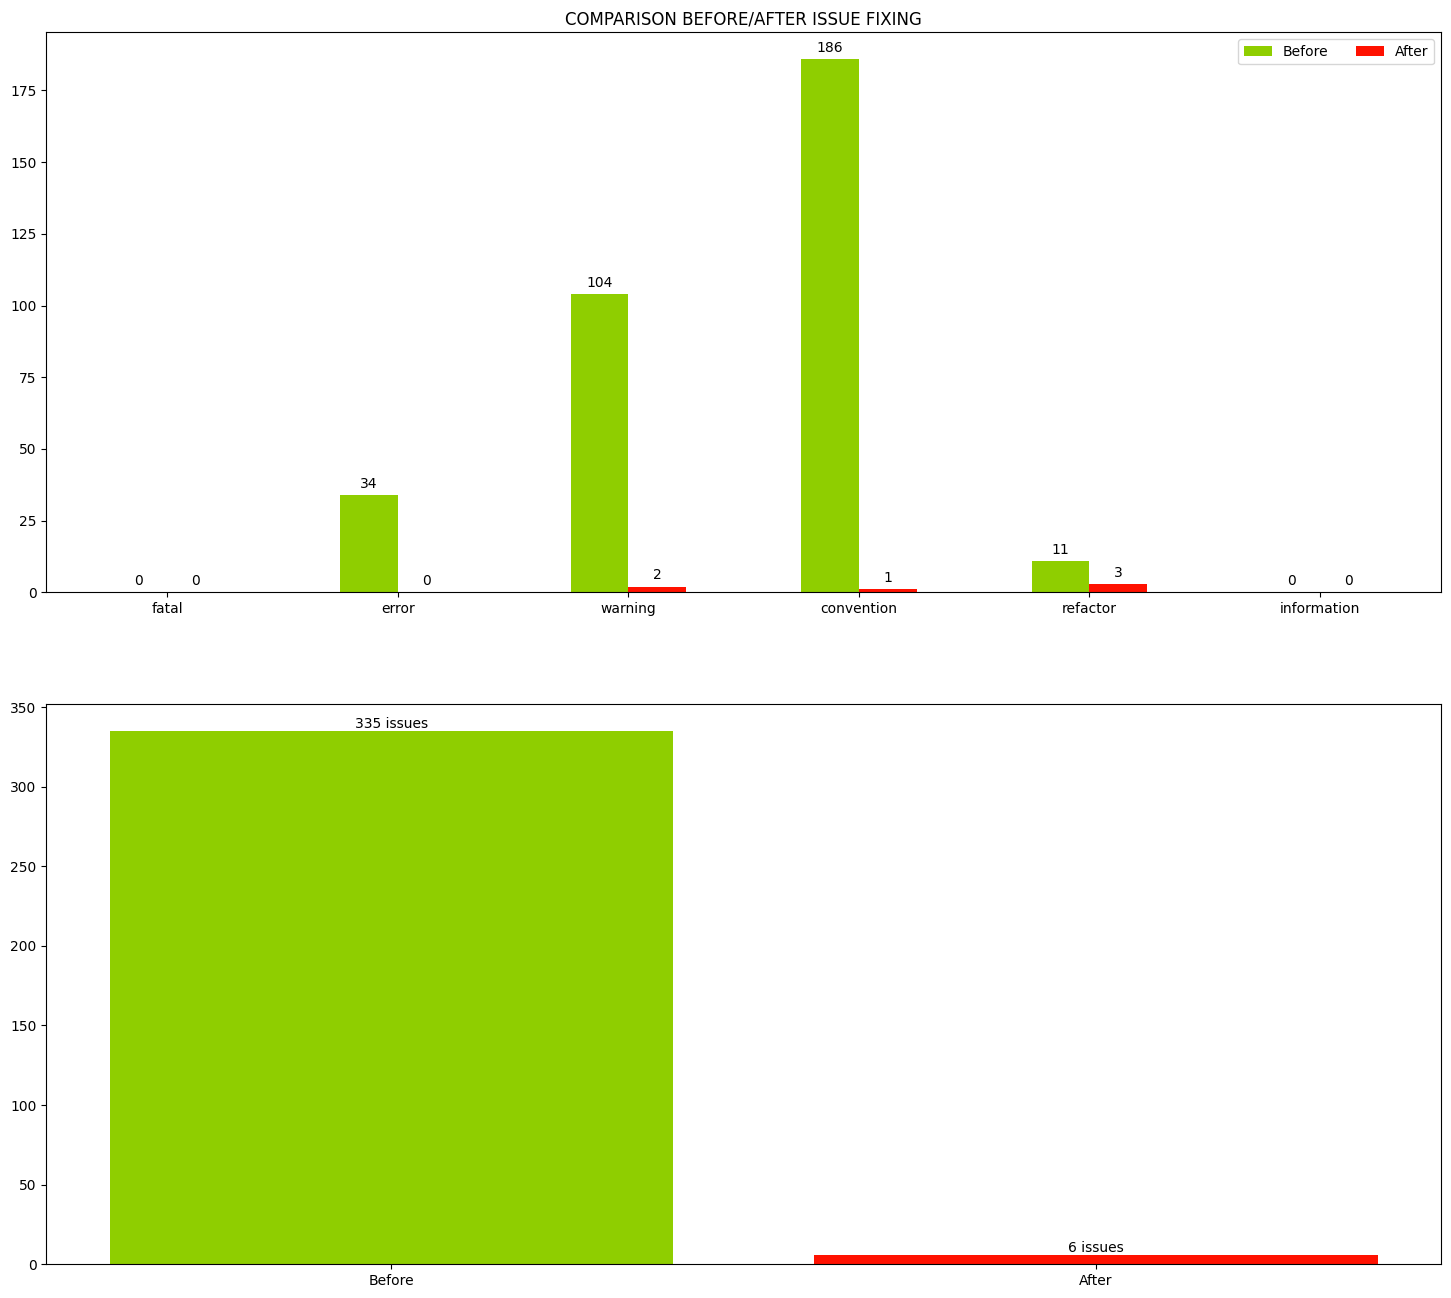

In [18]:
count2 = df2.type.value_counts()
count2.add(missing, fill_value=0)
ordered_by_severity2 = count2.reindex(index = order, fill_value=0)

labels_x = ordered_by_severity2.index
data_to_plot = {'Before': [], 'After': []}
for l in labels_x:
    data_to_plot['Before'].append(ordered_by_severity1[l])
    data_to_plot['After'].append(ordered_by_severity2[l])

x1 = np.arange(len(labels_x))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ((ax1), (ax2)) = plt.subplots(2, 1, figsize=(18, 16))
for attribute, measurement in data_to_plot.items():
    offset = width * multiplier
    rects = ax1.bar(x1 + offset, [round(i, 3) for i in measurement], width, label = attribute, color = ['#8fce00' if attribute == 'Before' else '#ff1100'])
    ax1.bar_label(rects, padding = 3)
    multiplier += 1
    ax1.set_title('COMPARISON BEFORE/AFTER ISSUE FIXING')
    ax1.set_xticks(x1 + (width/2), labels_x)
    ax1.legend(loc = 'upper right', ncol = 2)

bars = ax2.bar(list(data_to_plot.keys()), [len(df1), len(df2)], color = ['#8fce00', '#ff1100'])
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.0f} issues', ha='center', va='bottom')

plt.show()